In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#!pip install deepchem rdkit matplotlib networkx

import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from deepchem.feat import MolGraphConvFeaturizer
from deepchem.feat import CircularFingerprint
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from deepchem.feat import ConvMolFeaturizer
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
import deepchem as dc
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate


from methods_fingerprints import *
#from drive.MyDrive.code.methods import *
#from drive.MyDrive.code.methods_fingerprints import *

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 36.4 MB/s eta 0:00:00


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


In [ ]:
smiles_tr,smiles_test, logSweeter_tr, logSweeter_test, families_tr, families_test = load_data("../data/SweetnersDB.xlsx")#"/content/drive/MyDrive/code/SweetnersDB.xlsx")
X_tr,X_test,scaler_X = prepare_fingerprint(smiles_tr,smiles_test)
y_tr,y_test,scaler_y = prepare_targets(logSweeter_tr,logSweeter_test)
onehot_tr,onehot_test = prepare_famille_chimique(families_tr, families_test)
# Combiner les fingerprints et l'encodage one-hot
#representation_tr = np.hstack((X_tr, onehot_tr))
#representation_test = np.hstack((X_test,onehot_test))

Index(['Name', 'logSw', 'Chemical family', 'Dataset', 'Smiles'], dtype='object')


[12:54:25] DEPRECATION WARNING: please use MorganGenerator
[12:54:25] DEPRECATION WARNING: please use MorganGenerator
[12:54:25] DEPRECATION WARNING: please use MorganGenerator
[12:54:25] DEPRECATION WARNING: please use MorganGenerator
[12:54:25] DEPRECATION WARNING: please use MorganGenerator
[12:54:25] DEPRECATION WARNING: please use MorganGenerator
[12:54:25] DEPRECATION WARNING: please use MorganGenerator
[12:54:25] DEPRECATION WARNING: please use MorganGenerator
[12:54:25] DEPRECATION WARNING: please use MorganGenerator
[12:54:25] DEPRECATION WARNING: please use MorganGenerator
[12:54:25] DEPRECATION WARNING: please use MorganGenerator
[12:54:25] DEPRECATION WARNING: please use MorganGenerator
[12:54:25] DEPRECATION WARNING: please use MorganGenerator
[12:54:25] DEPRECATION WARNING: please use MorganGenerator
[12:54:25] DEPRECATION WARNING: please use MorganGenerator
[12:54:25] DEPRECATION WARNING: please use MorganGenerator
[12:54:25] DEPRECATION WARNING: please use MorganGenerat

In [ ]:
input_fingerprint = Input(shape=(1024,), name='fingerprint_input')
input_famille = Input(shape=(10,), name='famille_input')

# Combiner les entrées
concat = Concatenate()([input_fingerprint, input_famille])

# Ajouter des couches denses
dense = Dense(512, activation='relu')(concat)
output = Dense(256, activation='relu')(dense)

# Créer le modèle
model = Model(inputs=[input_fingerprint, input_famille], outputs=output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ fingerprint_input         │ (None, 1024)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ famille_input             │ (None, 10)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 1034)           │              0 │ fingerprint_input[0][… │
│                           │                        │                │ famille_input[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 512)            │        529,920 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 256)            │        131,328 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 661,248 (2.52 MB)

 Trainable params: 661,248 (2.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Faire une prédiction avec le modèle
predictions_tr = model.predict([X_tr, onehot_tr])
print("\nPrédictions :")
print(predictions_tr)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Prédictions :
[[0.5225698  0.42638838 0.48550788 ... 0.         0.         0.21903023]
 [0.72880423 0.         0.         ... 0.         1.0023729  0.        ]
 [0.29690108 0.         0.19456223 ... 0.         0.08387294 0.        ]
 ...
 [0.3002767  0.         0.         ... 0.         0.38823667 0.3450383 ]
 [1.0943297  0.         2.3371315  ... 0.         0.         0.51085097]
 [0.5354501  0.         1.2069976  ... 0.77888644 0.06319156 0.        ]]


In [ ]:
# Faire une prédiction avec le modèle
predictions_test = model.predict([X_test, onehot_test])
print("\nPrédictions :")
print(predictions_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

Prédictions :
[[0.27969208 0.         0.11257847 ... 0.         0.12583727 0.        ]
 [0.22517931 0.         0.57964855 ... 0.         0.         0.        ]
 [1.2176527  0.         0.         ... 1.573715   0.         0.        ]
 ...
 [0.37243402 0.609967   1.335221   ... 1.3118429  0.         0.        ]
 [1.9402062  1.1762387  0.         ... 0.         0.32025754 0.9762055 ]
 [1.3790915  0.         1.3960545  ... 0.         0.         0.5835591 ]]


# regression

In [ ]:
# Créer et entraîner le modèle SVR
svr = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svr.fit(predictions_tr, y_tr)

SVR(C=100)

In [ ]:
# Évaluer le modèle
score = svr.score(predictions_test, y_test)
print(f"Score R² du modèle: {score:.2f}")

Score R² du modèle: 0.56


In [ ]:
# Faire des prédictions
y_pred_train = svr.predict(predictions_tr)
y_pred_test = svr.predict(predictions_test)

In [ ]:
# Inverser la normalisation pour obtenir les valeurs réelles
y_pred_train = scaler_y.inverse_transform(y_pred_train.reshape(-1, 1)).ravel()
y_pred_test = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1)).ravel()
y_train = scaler_y.inverse_transform(y_tr.reshape(-1, 1)).ravel()
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

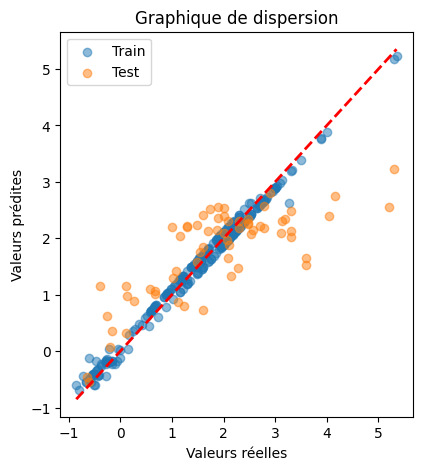

In [ ]:
y = np.hstack((y_train,y_test))
# Visualisation : Graphique de dispersion
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Train')
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Graphique de dispersion')
plt.legend()

#Scoring

In [ ]:
accuracy_log,conf_matrix_log,class_report_log,y_pred_log,target_test_log = scoring(y_tr,y_test,predictions_tr,predictions_test,0,"LogReg")

Accuracy: 0.78125
Confusion Matrix:
[[ 5  1]
 [13 45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.83      0.42         6
           1       0.98      0.78      0.87        58

    accuracy                           0.78        64
   macro avg       0.63      0.80      0.64        64
weighted avg       0.91      0.78      0.82        64



In [ ]:
accuracy_tree,conf_matrix_tree,class_report_tree,y_pred_tree,target_test_tree = scoring(y_tr,y_test,predictions_tr,predictions_test,0,"DecisionTree")

Accuracy: 0.671875
Confusion Matrix:
[[ 5  1]
 [20 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.83      0.32         6
           1       0.97      0.66      0.78        58

    accuracy                           0.67        64
   macro avg       0.59      0.74      0.55        64
weighted avg       0.90      0.67      0.74        64



In [ ]:
accuracy_rf,conf_matrix_rf,class_report_rf,y_pred_rf,target_test_rf = scoring(y_tr,y_test,predictions_tr,predictions_test,0,"RandomF")

Accuracy: 0.875
Confusion Matrix:
[[ 5  1]
 [ 7 51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.83      0.56         6
           1       0.98      0.88      0.93        58

    accuracy                           0.88        64
   macro avg       0.70      0.86      0.74        64
weighted avg       0.93      0.88      0.89        64

